<img src='https://github.com/mbdfmad/fmad2223/raw/main/fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
2022-10-17 Exam.
<a class="tocSkip">   
</h1>  

<h1 style='font-family: Optima;color:red'>
NOMBRE Y APELLIDO: María José Medina Hernández
</h1>    

# Instructions <a class="tocSkip">

+ The exam consists of a short Moodle quiz and a data analysis exercise described below in this notebook. You can access the quiz in this link:  
    [https://sifo.comillas.edu/mod/quiz/view.php?id=2579775&forceview=1](https://sifo.comillas.edu/mod/quiz/view.php?id=2579775&forceview=1)  

+ The exam quiz accounts for a 20% of the exam grade and the data analysis accounts for the remaining 80%. We recommend that you don't use more than 20-25 minutes for the quiz!

+ All the questions in the exam have the same value.
    
+ During the exam you can use code fragments from the lectures, check your notes, go online to read documentation, etc. The only requirement is that the exam reflects your individual work.  
    **Please take this as a warning: getting external help during the exam will not be tolerated and will have academic consequences beyond this exam.** 
    
+ Use this notebook to answer the exam question. When you are done simply email the notebook with your answers to 
<a href="mailto:fsansegundo@comillas.edu?subject=FMAD exam submission">fsansegundo@comillas.edu</a>
    

# Introduction to the Data Set <a class="tocSkip">
    
+ For this exam we will be using a data set containing information about crime rates in different communities of the US in 1990. This data set has been adapted for the exam, starting from a classical example frequently used for Machine Learning models. You can find more information about this data set and the meaning of the variable names in the following link (look for the *Attribute Information* section):

  [https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)  

+ You can download the data set using this link:
  
    [crimes_exam_data.csv](https://gist.githubusercontent.com/fsansegundo/513d3468f832bf9c928bdb010230447b/raw/580a33130ad481aa9ec68f07225e7c8e19a5abbe/crimes_exam_data.csv)

# Preliminaries <a class="tocSkip">

+ We add here the import commands for the common data science libraries so you don't have to waste time importing them. **But we warned that you may need additional imports for some questions!**

In [1]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
sns.set()
import statsmodels.stats.power as smp
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

+ Read the data file into a pandas `DataFrame` **called `crimes`**, which we will use for the rest of the exam.

In [2]:
crimes = pd.read_csv('crimes_exam_data.csv')
crimes.head()

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.0,75122,...,0.0,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,100.0,47917,...,0.0,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,100.0,35669,...,8.3,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,0.0,20580,...,0.0,57.86,57.86,190.93,1301.78,4142.56,271.93,NaN,306.64,NaN
4,Bemidjicity,MN,11245,2.76,24.46,40.53,28.69,12.65,0.0,17390,...,0.0,NaN,32.04,112.14,728.93,8490.87,728.93,40.05,NaN,9988.79


# Questions <a class="tocSkip">

### Question 1:  <a class="tocSkip">

+ How many rows are there in the table? 
+ How many variables?    
+ Which variable has the most missing data? 
    
After answering this question **make sure to remove all rows containing missing data** from the table before proceeding to the next question.

**Answer:**

In [3]:
print(f"The dataset has {crimes.shape[0]} rows and {crimes.shape[1]} columns or variables")

The dataset has 2215 rows and 23 columns or variables


In [4]:
data_na =  crimes.isna()
data_na.sum().sort_values(ascending = False)

ViolentCrimesPerPop    221
rapesPerPop            208
nonViolPerPop           97
arsonsPerPop            91
assaultPerPop           13
autoTheftPerPop          3
larcPerPop               3
burglPerPop              3
robbbPerPop              1
LemasPctOfficDrugUn      0
murdPerPop               0
communityname            0
state                    0
PctPopUnderPov           0
medIncome                0
pctUrban                 0
agePct65up               0
agePct16t24              0
agePct12t29              0
agePct12t21              0
householdsize            0
population               0
PopDens                  0
dtype: int64

The variable with most missing values is ViolentCrimesPerPop

In [5]:
crimes.dropna(inplace=True)
np.any(crimes.isna())

False

### Question 2:  <a class="tocSkip">

+ Show the variables in the data set and their types. If there are categorical variables identify them and convert them to that type. 
    
**Answer:**

The next line shows the variables in the dataset. The type is specified in Dtype

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2214
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   communityname        1902 non-null   object 
 1   state                1902 non-null   object 
 2   population           1902 non-null   int64  
 3   householdsize        1902 non-null   float64
 4   agePct12t21          1902 non-null   float64
 5   agePct12t29          1902 non-null   float64
 6   agePct16t24          1902 non-null   float64
 7   agePct65up           1902 non-null   float64
 8   pctUrban             1902 non-null   float64
 9   medIncome            1902 non-null   int64  
 10  PctPopUnderPov       1902 non-null   float64
 11  PopDens              1902 non-null   float64
 12  LemasPctOfficDrugUn  1902 non-null   float64
 13  murdPerPop           1902 non-null   float64
 14  rapesPerPop          1902 non-null   float64
 15  robbbPerPop          1902 non-null   f

There are two clearly categorical variables: communityname and state. Then, it is necessary to check the the integer variables since they could be categorical in nature. However, neither the population nor the medIncome are categories. We finally convert the categorical variables:

In [7]:
data_objects = crimes.columns[crimes.dtypes == 'object']
crimes[data_objects] = crimes[data_objects].astype('category', )
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 2214
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   communityname        1902 non-null   category
 1   state                1902 non-null   category
 2   population           1902 non-null   int64   
 3   householdsize        1902 non-null   float64 
 4   agePct12t21          1902 non-null   float64 
 5   agePct12t29          1902 non-null   float64 
 6   agePct16t24          1902 non-null   float64 
 7   agePct65up           1902 non-null   float64 
 8   pctUrban             1902 non-null   float64 
 9   medIncome            1902 non-null   int64   
 10  PctPopUnderPov       1902 non-null   float64 
 11  PopDens              1902 non-null   float64 
 12  LemasPctOfficDrugUn  1902 non-null   float64 
 13  murdPerPop           1902 non-null   float64 
 14  rapesPerPop          1902 non-null   float64 
 15  robbbPerPop          

data_objects### Question 3:  <a class="tocSkip">

+ For the variables 
 ```    
 'population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens'   
 ```
 (copy and paste them!) do a basic numeric summary that contains their mean, median, quartiles, sd and range (min and max).  
 *Hint:* you can do this in a single table for all those variables. 

+ Make a *pairplot* for all these variables.    
    
**Answer:**    

Summary:

In [8]:
crimes_red = crimes[['population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens']]
crimes_red.describe()

,population,householdsize,pctUrban,medIncome,PctPopUnderPov,PopDens
count,1.902000e+03,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,5.248226e+04,2.712077,69.960931,33947.199790,11.674858,2803.496793
std,2.060649e+05,0.347385,44.270759,13497.931524,8.477675,2944.885801
min,1.000500e+04,1.600000,0.000000,12908.000000,0.640000,10.000000
25%,1.432350e+04,2.500000,0.000000,23702.750000,4.630000,1175.925000
50%,2.268100e+04,2.660000,100.000000,31268.000000,9.425000,2000.700000
75%,4.324975e+04,2.860000,100.000000,41484.750000,17.040000,3277.375000
max,7.322564e+06,5.280000,100.000000,123625.000000,48.820000,44229.900000


Pairplot

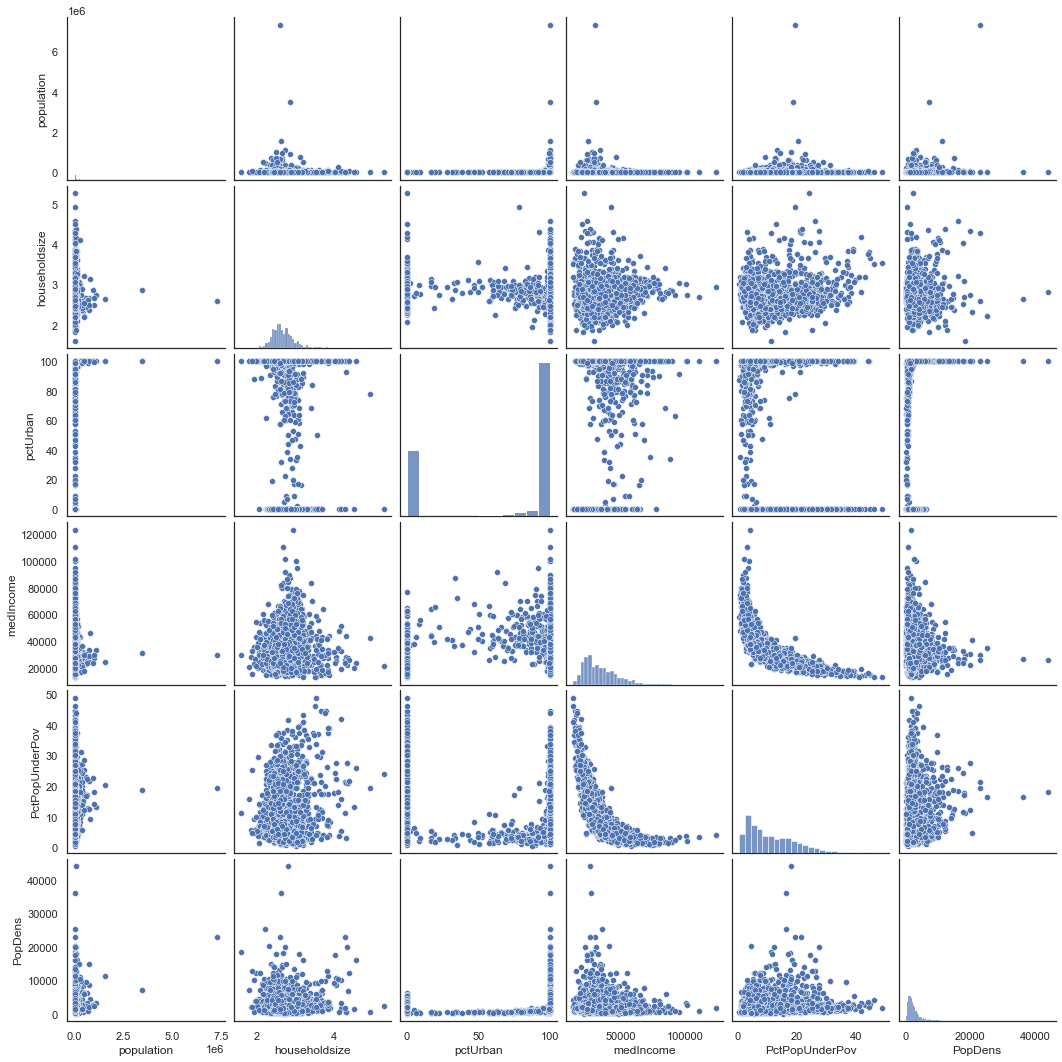

In [31]:
sns.set_style("white")
sns.pairplot(crimes_red)
plt.show()

### Question 4:  <a class="tocSkip">

+ Create a new column called `houseSize` dividing (binning) `householdSize` in 8 levels, from 1 to 5.5 in increments of 0.5:  
    $\qquad\qquad\qquad\qquad\qquad (1, 1.5],\quad (1.5, 2],\,\ldots\,, (4.5, 5],\quad (5, 5.5]$

+ Make a *frequencies table* for `houseSize` containing the absolute and relative frequencies (in the same table). 
    
+ Looking at the pair plot observe the distribution of `pctUrban`. Find the number of communities that are *not purely urban but also not purely rural*. That is, find the number of rows of the table where  `pctUrban` is *simultaneously* bigger than 10 and smaller than 90. **Discard these rows from the table, but keep the name `crimes` for the resulting table.**
    
+ **After doing that** create another column called `isUrban` with value `True` if `pctUrban` $\geq 90$ and value `False` otherwise. Create a relative frequency table for `isUrban`.
    


**Answer:**    

- Create new column housesize

In [9]:
start = 1 # Change
stop = 6 # Change
step = 0.5 # Change

C_nodes = np.arange(start, stop, step)
crimes['houseSize'] = pd.cut(crimes['householdsize'], bins=C_nodes, ordered=True) #Change
print(crimes.houseSize.value_counts(dropna = False))

(2.5, 3.0]    1134
(2.0, 2.5]     482
(3.0, 3.5]     209
(3.5, 4.0]      44
(4.0, 4.5]      17
(1.5, 2.0]      12
(4.5, 5.0]       3
(5.0, 5.5]       1
(1.0, 1.5]       0
Name: houseSize, dtype: int64


- Drop communities that are not purely urban but also not purely rural

In [10]:
n = len(crimes[(crimes.pctUrban > 10) & (crimes.pctUrban < 90)])
print(f"There are {n} communities that are not completely rural nor urban")
crimes = crimes[(crimes.pctUrban <= 10)| (crimes.pctUrban >= 90)]
crimes

There are 131 communities that are not completely rural nor urban


,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,houseSize
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.00,75122,...,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,"(3.0, 3.5]"
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,100.00,47917,...,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95,"(2.5, 3.0]"
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,100.00,35669,...,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51,"(2.0, 2.5]"
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,100.00,21577,...,50.98,90.05,297.29,1386.46,5091.64,300.60,88.72,442.95,6867.42,"(2.0, 2.5]"
6,Norwoodtown,MA,28700,2.60,11.17,27.41,12.76,14.42,100.00,42805,...,13.53,30.44,182.66,372.09,974.19,487.10,57.50,226.63,1890.88,"(2.5, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,3.07,15.46,30.16,14.34,8.08,100.00,24727,...,49.46,199.50,280.29,2268.72,4225.82,806.25,56.06,545.75,7356.84,"(3.0, 3.5]"
2211,Pinevillecity,LA,12251,2.68,17.36,31.23,16.97,12.57,100.00,20321,...,33.09,8.27,82.73,860.43,4748.90,198.56,16.55,124.10,5824.44,"(2.5, 3.0]"
2212,Yucaipacity,CA,32824,2.46,11.81,20.96,9.53,20.73,100.00,27182,...,13.61,65.32,261.29,1709.26,2435.97,487.19,21.77,353.83,4654.20,"(2.0, 2.5]"
2213,Beevillecity,TX,13547,2.89,17.16,30.01,14.73,10.42,0.00,19899,...,15.71,54.98,620.48,1508.01,3722.90,102.10,7.85,691.17,5340.87,"(2.5, 3.0]"


In [11]:
crimes["isUrban"] = crimes.pctUrban >= 90

### Question 5:  <a class="tocSkip">

    
+ Make a plot showing (in the same plot) a histogram and density curve for `householdSize`. For the histogram make sure to use the same bins that you used for creating `houseSize`
    
+ Make a boxplot of `medIncome`. How many outliers are there? What community corresponds to the first (smallest) and last outliers (use the `comunityname` variable to find out their names).  

**Answer:**

Density curve + histogram of householdsize

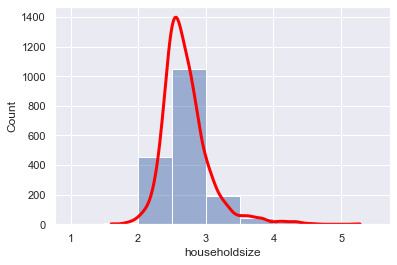

In [12]:
dens_plot = sns.histplot(data = crimes, x = 'householdsize', kde=True, bins=C_nodes)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

Boxplot:

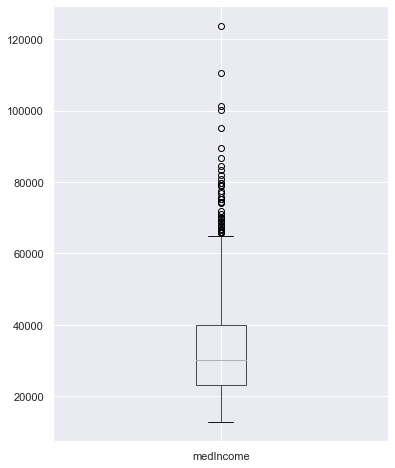

In [13]:
getPlot = crimes.boxplot(column='medIncome', figsize=(6, 8))

In [14]:
q1 = crimes.medIncome.describe()["25%"]
q3 = crimes.medIncome.describe()["75%"]
print(f"q1: {q1}")
print(f"q2: {q3}")
IQR = q3 - q1
outliers = crimes[((crimes.medIncome<(q1-1.5*IQR)) | (crimes.medIncome>(q3+1.5*IQR)))]
print(f"There are {len(outliers)} outliers, that occupy the following positions in the dataset: {outliers.index.values}")
ouliers_sorted = outliers.sort_values(by = 'medIncome').communityname.values
print(f"The first outlier is {ouliers_sorted[0]} and the last is {ouliers_sorted[-1]}")

q1: 23269.5
q2: 39886.5
There are 42 outliers, that occupy the following positions in the dataset: [   0  156  192  217  252  317  334  432  437  441  528  557  597  625
  680  778  840  919  935  940 1002 1100 1174 1254 1258 1262 1314 1460
 1508 1552 1590 1596 1600 1640 1775 1828 1890 1892 1947 2000 2105 2190]
The first outlier is Ramseyborough and the last is Hillsboroughtown


### Question 6:  <a class="tocSkip">
    
    
+ Find the total population for each state, adding up the observations in the table corresponding to that state. 

+ Create a new data set containing only the data corresponding to the five most populated states. Call that new data set `crimesTop5`.

<hr style='border: 1px dashed blue'>
    
**Before gsort_valuesn:** make sure that you create a list called `top5names` with the names of the top 5 most populated states. For example, this could be 
```
top5Names = ['DC', 'FL', 'PA', 'TX', 'FL']    
```
(but it is not! you have to find the real one)  Then, when you have created the list, run this code to remove the levels for the non top 5 states:
```    
top5_cat = pd.CategoricalDtype(top5Names)
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)    
```    
<hr style='border: 1px dashed blue'>    
    
+ After doing that, and using the data in `crimesTop5`, find the median by state of `ViolentCrimesPerPop`. Also choose a good plot to visualize the (possible) relation between these two variables.  
 **Optional:** Make a graphic judgment: does this relation depend on the `isUrban` variable?

**Answer:**

The population of each state:

In [15]:
state_pop = crimes.groupby('state').population.sum()
state_pop

state
AK      283932
AL     1039876
AR      816863
AZ     2516233
CA    21957110
CO     1935534
CT     1956828
DC      606900
DE       27630
FL     4594142
GA     1601370
IA      346066
ID      196903
IN     2371482
KY      802721
LA      953776
MA     2666766
MD      926761
ME      350790
MN       99028
MO     1546912
MS      623259
NC     2049543
ND      264422
NH      449349
NJ     5311587
NM      582205
NV      469654
NY     9075692
OH     4362745
OK     1727382
OR     1329209
PA     3938166
RI      701455
SC      791754
SD      207635
TN     1641471
TX     8571622
UT      809808
VA     2164076
WA     1911658
WI     2316142
WV      347532
WY      150894
Name: population, dtype: int64

The 5 most populated states are:

In [19]:
top5Names = list(state_pop.sort_values(ascending=False).index[:5])
top5Names

['CA', 'NY', 'TX', 'NJ', 'FL']

New dataset crimesTop5:

In [17]:
crimesTop5 = crimes[crimes.state.isin(top5Names)]
crimesTop5.state.value_counts(dropna = False)
print(crimesTop5.state.unique())
crimesTop5.head()

['NJ', 'TX', 'CA', 'NY', 'FL']
Categories (5, object): ['NJ', 'TX', 'CA', 'NY', 'FL']


,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,houseSize,isUrban
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.0,75122,...,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,"(3.0, 3.5]",True
9,Wacocity,TX,103590,2.62,19.88,34.55,21.62,13.12,100.0,17852,...,419.89,966.77,2221.81,5673.63,991.80,16.68,1544.24,8903.93,"(2.5, 3.0]",True
10,Shermancity,TX,31601,2.54,15.73,28.57,15.16,14.26,100.0,24763,...,220.96,407.69,1456.49,5654.80,469.94,18.67,722.02,7599.90,"(2.5, 3.0]",True
11,SanPablocity,CA,25158,2.89,13.65,28.82,13.23,9.44,100.0,25479,...,1143.81,1340.00,1769.39,5404.40,1591.71,74.03,2605.96,8839.53,"(2.5, 3.0]",True
17,Glendalecity,CA,180038,2.62,12.04,26.68,12.37,11.54,100.0,34372,...,197.91,154.42,889.74,2509.23,806.68,40.70,374.07,4246.34,"(2.5, 3.0]",True


In [20]:
top5_cat = pd.CategoricalDtype(top5Names)
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)

In [21]:
crimesTop5.state.value_counts()

CA    278
NJ    183
TX    152
FL     90
NY     29
Name: state, dtype: int64

Median of ViolentCrimesPerPop by state:

In [22]:
vcrimes_state = crimesTop5.groupby('state').ViolentCrimesPerPop.median()
vcrimes_state

state
CA    641.840
NY    426.710
TX    495.865
NJ    233.220
FL    965.520
Name: ViolentCrimesPerPop, dtype: float64

Bar plot:

<BarContainer object of 5 artists>

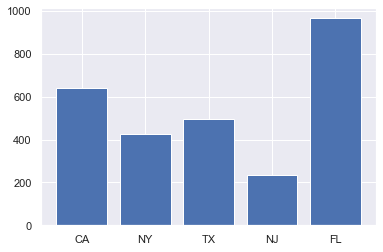

In [23]:
plt.bar(x = vcrimes_state.index, height=vcrimes_state.values)

The state that has the most violent crimes per population is Florida (FL), then California (CA), Texas (TX), New York (NY) and, finally, New Jersey (NJ)

### Question 7:  <a class="tocSkip">

+ If we randomly pick a community whose `PopDens` is *below-average* (lower than the mean `PopDens` for all communities), find the probability `p` that  its `robbbPerPop` value is less than 30. 
    
+ Using the previous result: suppose that we take a random sample (with replacement) of 15  *below-average* `PopDens` communities. What is the **theoretical** probability that **5 or more** of them will have a `robbbPerPop` value less than 30. 

+ Check that result using a simulation where you take $N = 10000$ samples, each of them with 15 *below-average* `PopDens` communities and find the relative frequency of the event:  5 or more of them have a `robbbPerPop` value less than 30.    
    
**Answer:**

In [24]:
meanPopDens = crimes.PopDens.mean()
print(f"The mean for the population density is: {meanPopDens}")
low_pop_dens = crimes[crimes.PopDens < meanPopDens]
p = sum(low_pop_dens.robbbPerPop < 30)/len(low_pop_dens)
print(f"The probability that the robbbPerPop is below 30 given that the population density is below average is {p}")

The mean for the population density is: 2961.826595143989
The probability that the robbbPerPop is below 30 given that the population density is below average is 0.2767191383595692


In [25]:
n = 15
r = 4
p = p
p_5orMore = stats.binom.sf(r, n = n, p = p)
print(f"The theoretical probability that 5 or more will have a robbbPerPop under 30 is {p_5orMore}")

The theoretical probability that 5 or more will have a robbbPerPop under 30 is 0.4041187617249587


In [26]:
N = 10000 # Number of iterations of the experiment
n = 15 # number of communities
sample = crimes.sample(n*N, replace = True) # We sample n employees with replacement N times
samples = sample.robbbPerPop.values.reshape([n, N]) # We reshape the sample into a nxN matrix in order to keep the experiments separated

In [28]:
rob_less_30 = sum(samples < 30)
sum(rob_less_30 >= 5)/N

0.2281

The theoretical probability is higher that the experimental one. Therefore, they probably are not independent

### Question 8:  <a class="tocSkip">

+ Using the whole `crimes` data set. Find the two states with the lowest and highest median values for `PctPopUnderPov`. Then find the two 95% confidence intervals for the means of `assaultPerPop` for each of these two states. What is your conclussion? 
    
**Answer:**

In [53]:
state_pov = crimes.groupby('state').PctPopUnderPov.median().sort_values()
state_pov

state
CT     3.870
NJ     4.140
MA     5.100
PA     5.780
MN     5.985
RI     6.675
NH     6.705
AK     7.070
WI     7.500
UT     8.275
OH     8.595
MO     8.895
CA     9.145
NV     9.285
WY     9.690
FL    10.375
IN    10.515
CO    11.050
ME    11.470
VA    11.525
DE    12.450
SD    12.820
IA    12.890
WA    13.010
AZ    13.035
ND    13.965
OR    14.530
NY    14.710
ID    15.340
OK    15.480
MD    15.820
NC    16.005
TN    16.560
DC    16.870
SC    17.050
TX    17.350
AR    17.500
WV    17.895
KY    18.295
AL    19.520
GA    21.330
NM    22.290
MS    25.070
LA    26.170
Name: PctPopUnderPov, dtype: float64

The state with the lowest percentage of population under poverty is CT with 3.870. the highest is LA with 26.170.

- Confidence interval for CT:

In [55]:
CT = crimes[crimes.state == 'CT']
n = len(CT)
barX = CT.PctPopUnderPov.mean()
s = CT.PctPopUnderPov.std()

# Short version of the critical point computation:
cl = 0.95 # Change
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval is  [4.37789132 7.54388646]
Rounded to 4 digits: [4.378, 7.544]


- Confidence interval for LA 

In [57]:
LA = crimes[crimes.state == 'LA']
n = len(LA)
barX = LA.PctPopUnderPov.mean()
s = LA.PctPopUnderPov.std()

# Short version of the critical point computation:
cl = 0.95 # Change
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval is  [22.6836404  29.99530697]
Rounded to 4 digits: [22.68, 30.0]


The number of assaults is higher in the states where poverty is higher. Therefore, is is possible that poverty and this type of crime are linked

### Question 9:  <a class="tocSkip">

+ Using the whole `crimes` data set. Find $\mu_0$, the mean of `autoTheftPerPop` for those communities where `pctUrban < 10` (equivalently, `isUrban` is `False`). 
    
+ Take a random sample (with replacement) of 30 communities with `pctUrban >= 90` (equivalently, `isUrban` is `True`) and use it to test (95% significance level) the **alternative hypothesis:** the mean `autoTheftPerPop` for urban communities is higher than $\mu_0$. Make sure to set `random_state=2022` in the pandas `sample` method (or the equivalent `random.seed` if you use NumPy) to ensure the reproducibility of the sample. 
    
+ **Optional:** consider the sample above as a *pilot study*. What sample size (number of communities) would you need to get 80% power in a test of the same hypothesis, if you want a precision $\delta = 50$ with significance level equal = 95%.  

**Answer:**
    


In [31]:
rural = crimes[crimes.isUrban == False]
mu0 = rural.autoTheftPerPop.mean()
print(f"The mean for autoTheftPerPop for rural communities is {mu0}")

The mean for autoTheftPerPop for rural communities is 282.0624574669187


In [32]:
urban = crimes[crimes.isUrban]
np.random.seed(2022)
urban_sample =  urban.sample(30, replace = True)

In [33]:
X = urban_sample.autoTheftPerPop

mu0 = mu0
alternative = "greater" # Change to alternative hypothesis: less, greater or two-sided

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is  30
The sample mean is 671.5
The T score is 4.056
And the corresponding p-value is 0.0001718


The p-value is lower than 0.05. Therefore, we can reject the null hypothesis and we can confirm that the mean for autoTheftPerPop is higher in urban communities.

In [34]:
delta = 50 # Change
sd = urban_sample.std() # Change
alpha = 0.05 # Change
power = 0.8
n = smp.ttest_power(effect_size = delta / sd, 
                power=power, alpha=alpha, alternative="larger")

print("The power for the test is {:.3}".format(power))

TypeError: ttest_power() got an unexpected keyword argument 'power'

### Question 10:  <a class="tocSkip">

+ Consider only the  communities from the state of California (CA). Make a linear regression model for the variables:  
  $x:$ `autoTheftPerPop`  
  $y:$ `robbbPerPop`  
     
+ What percentage of variability in the response is explained by the model? 
+ What is the increment in `robbPerPop` for each unit increment in `autoTheftPerPop`?
+ Make a scatter plot of these two variables along with the regression line. 
+ What is the predicted `robbPerPop` in a community with `autoTheftPerPop = 800`    
+ What is the first residual of the model (the residual for the first observation)? 

**Answer:**

In [69]:
CA = crimes[crimes.state == 'CA']

In [72]:
X = CA.autoTheftPerPop
Y = CA.robbbPerPop
X_1 = sm.add_constant(X)
model = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            robbbPerPop   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     422.5
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.39e-57
Time:                        17:54:33   Log-Likelihood:                -1821.6
No. Observations:                 278   AIC:                             3647.
Df Residuals:                     276   BIC:                             3655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.8130     16.939     -0.284      0.777     -38.159      28.532
autoTheftPerPop     0.3395      0.017     20.554      0.000       0.307       0.372
==============================================================================
Omnibus:                       86.179   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.716
Skew:                           1.396   Prob(JB):                     3.25e-53
Kurtosis:                       6.616   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
print(f"The model explains a {fit.rsquared*100}% of variance")

The model explains a 60.484031850418496% of variance


In [75]:
print(f"The increment in robbPerPop for each unit increment in autoTheftPerPop is 0.3395")

The increment in robbPerPop for each unit increment in autoTheftPerPop is 0.3395


Text(0.5, 1.0, 'Linear Regression')

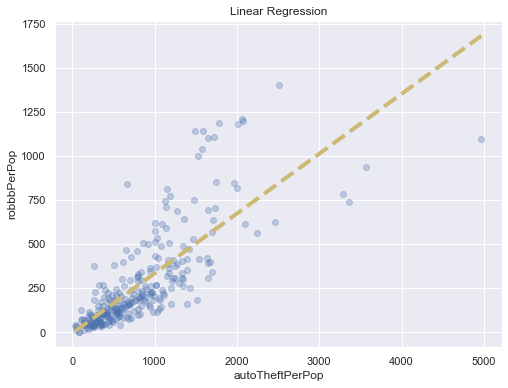

In [77]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
fit.pred = fit.get_prediction(X_new)
fit_fitted_new = fit.pred.summary_frame(alpha=0.05)["mean"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data", alpha = 0.3)
ax.plot(X_new[:,1], fit_fitted_new, "y--", lw = 4)
plt.xlabel('autoTheftPerPop')
plt.ylabel('robbbPerPop') 
plt.title('Linear Regression')

In [81]:
X_new = [1,800]
pred = fit.predict(X_new)
print(f"The predicted robbPerPop in a community with autoTheftPerPop = 800 is {pred[0]}")

The predicted robbPerPop in a community with autoTheftPerPop = 800 is 266.80520814406646


In [85]:
x = [1, CA.autoTheftPerPop.values[0]]
y_hat = fit.predict(x)
y_hat

array([535.6088012])

In [88]:
y = CA.robbbPerPop.values[0]
y

1143.81

In [89]:
res = y_hat - y
res

array([-608.2011988])

In [91]:
print(f"What is the first residual of the model (the residual for the first observation) is {res}")

What is the first residual of the model (the residual for the first observation) is [-608.2011988]
